# Contraction between pure- and complex-tone trials
##### The analyses were conducted by aggregating the 3 experiments and comparing the bias for each of the 4 types of consecutive trials:
##### pure --> pure
##### complex --> complex
##### pure --> complex
##### complex --> pure

In [14]:
from paper_utils import *
%matplotlib inline

In [15]:
dfs, datas, columns = load_data()
dfs, columns = organize_data(dfs, columns)
df_comb, df1, df2, df3 = combine_data(dfs)

complex_pure_mixed_no_missing
in log e
(1, 310)
(1, 310)
(1, 310)
before filtering:  310
After acc filtering:  239
After consistency filtering:  230
(1, 230)
(1, 230)
(1, 230)
total left:  230/310
total excluded:  80/310
included: 74.1 % ; excluded: 25.8 %
complex_pure_mixed_missing_f
in log e
(1, 400)
(1, 400)
(1, 400)
before filtering:  400
After acc filtering:  332
After consistency filtering:  316
(1, 316)
(1, 316)
(1, 316)
total left:  316/400
total excluded:  84/400
included: 79.0 % ; excluded: 21.0 %
complex_pure_mixed_missing_f1
in log e
(1, 338)
(1, 338)
(1, 338)
before filtering:  338
After acc filtering:  272
After consistency filtering:  253
(1, 253)
(1, 253)
(1, 253)
total left:  253/338
total excluded:  85/338
included: 74.8 % ; excluded: 25.1 %
67850
93220
74635


In [16]:
'''
Export results from R
'''

fss = []
fes = []

readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_image1_a.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
fss.append(fs)
fes.append(es)

readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_image1_b.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
fss.append(fs)
fes.append(es)

readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_image1_c.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
fss.append(fs)
fes.append(es)

readRDS = robjects.r['readRDS']
df_tmp = readRDS('C:/Users/user/Aviel/Bias Project/project/Data/rds_files/my_data_image1_d.rds')
df_tmp = pandas2ri.ri2py(df_tmp)

fs = np.array(df_tmp[0])
es = np.array(df_tmp[1])
fss.append(fs)
fes.append(es)

c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launcher.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\user\miniconda3\envs\py39\lib\site-packages\ipykernel_launche

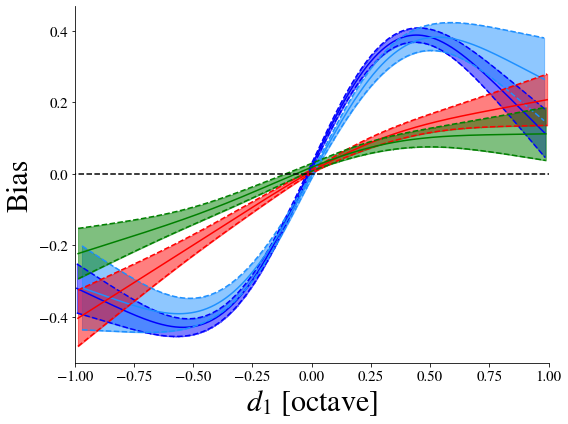

In [30]:
# ===== Human participants =====
d1_var = []
d1_area = []
d1_vals = []

colors = ['b' ,'dodgerblue', 'r', 'g']

f, axarr = plt.subplots(1, figsize=(8,6), sharey='row', sharex=True)
# colors = ['blue','green','cornflowerblue','lightgreen','red','m']
alpha=0.5
# colors = ['gold','dodgerblue']

ax = axarr
df = df_comb.copy()

for i,v in enumerate([1,6,2,4]):
    
    d1_var.append([])
    d1_area.append([])
    d1_vals.append([])
    
    df_1 = df[(df['flags_d1'].values==v)].copy()
    
    if v in [1,4]:
        df_1 = df_1.set_index(np.arange(len(df_1)))

        fs,es = -fss[i], -fes[i]
        o = np.argsort(df_1['d1'].values)
        plot_with_errors(ax,df_1['d1'].values[o],fs[o,1],es[o,1],colors[i],alpha=alpha)
        
        d1_vals[-1] = df_1['d1'].values
        
        for p in range(int(df_1['subject'].max()+1)):
            o = df_1['subject'].values==p
            vals = fs[o,1] + fs[o,4]
            d1_var[-1].append(vals.var())
            d1_area[-1].append(np.abs(vals).mean())
#             d1_area[-1].append(np.abs(vals-(vals).mean()).mean())
            

            
    elif v == 6:
        df_1['d1_r'] = df_1['d1']
        df_1['d1_r'][df_1['dinf']>0] = 0

        df_1['d1_r2'] = df_1['d1']
        df_1['d1_r2'][df_1['dinf']<0] = 0

        df_1 = df_1.set_index(np.arange(len(df_1)))

        fs,es = -fss[i], -fes[i]
        o = np.argsort(df_1['d1_r'].values)
        plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[i],alpha=alpha)
        
        d1_vals[-1] = df_1['d1_r'].values

        fs = fs[df_1['dinf']<0,:]
        df_1 = df_1[df_1['dinf']<0]
        for p in range(int(df_1['subject'].max()+1)):
            o = df_1['subject'].values==p
            I = fs[o,1]!=0
            vals = fs[o,1][I] + fs[o,5][I]
            d1_var[-1].append(vals.var())
            d1_area[-1].append(np.abs(vals).mean())
#             d1_area[-1].append(np.abs(vals-(vals).mean()).mean())            
        
    else:
        df_1 = df[(df['flags_d1'].values==v) | (df['flags_d1'].values==v+1)].copy()

        df_1['d1_r'] = df_1['d1']
        df_1['d1_r'][df_1['dinf']>0] = 0

        df_1['d1x2_r'] = df_1['d1x2']
        df_1['d1x2_r'][df_1['dinf']<0] = 0

        df_1 = df_1.set_index(np.arange(len(df_1)))

        fs,es = -fss[i], -fes[i]
        o = np.argsort(df_1['d1_r'].values)
        plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[i],alpha=alpha)

        d1_vals[-1] = df_1['d1_r'].values

        fs = fs[df_1['dinf']<0,:]
        df_1 = df_1[df_1['dinf']<0]
        for p in range(int(df_1['subject'].max()+1)):
            o = df_1['subject'].values==p
#             I = fs[o,1]!=0
#             print(fs[o,1])
            vals = fs[o,1] + fs[o,5]
            d1_var[-1].append(vals.var())
            d1_area[-1].append(np.abs(vals).mean())
#             d1_area[-1].append(np.abs(vals-(vals).mean()).mean())

# =================================================================================

ax.set_xlim([-1,1])

plt.xlabel("$d_1$ [octave]", fontsize = 30)
plt.ylabel("Bias", fontsize = 30)

draw_horizonal(ax,-2,2,0)
simpleaxis(ax)

plt.tight_layout()
plt.show()

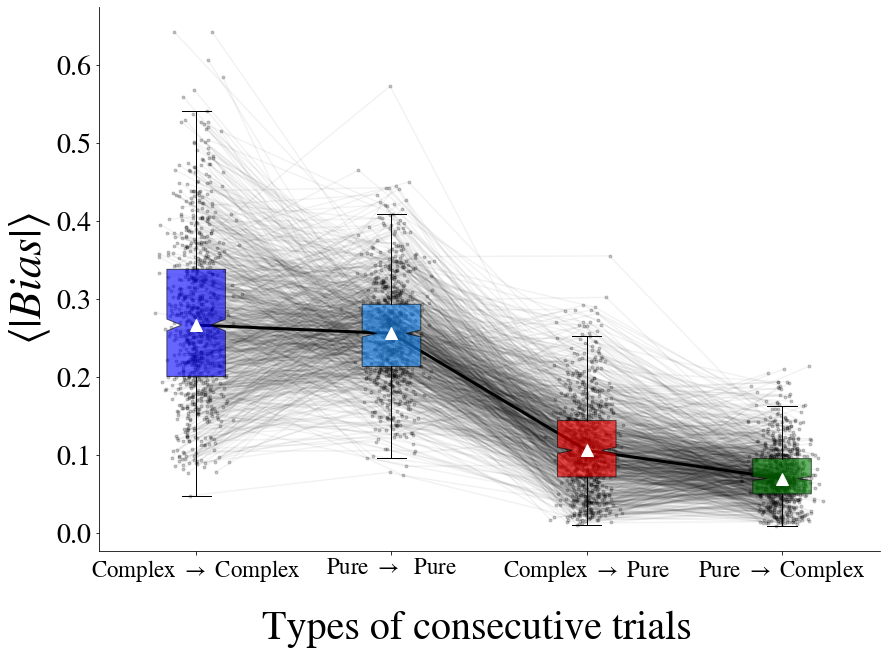

In [22]:
def box_plot(ax, data, xlabel = [], ylabel = [], title = '', alpha_face = 1, show_ind_dots = True, colors = []):
    
    l = len(data)
    y = np.arange(l)
    
    ys = []
    
    for i in range(l):
        ys.append(np.ones_like(data[i])*y[i] + np.random.randn(len(data[i]))*.07)
        # noise.append(np.random.randn(len(ys[i]))*.07)
    
    if show_ind_dots:
        for i in range(l):
            ax.plot(ys[i],data[i],'o',ms=3,color='k',alpha=.2)
        try:
            ax.plot(ys,data,'-',color = 'k',alpha=.05)
            ax.plot(y,np.median(data,1),'-k',lw=3)
        except:
            pass
    
    bplot1 = ax.boxplot(data , notch = 'True', positions=y, vert=1, patch_artist=True, showmeans=False,\
                        meanprops={"markerfacecolor":"w", "markeredgecolor":"w"},\
                        showfliers = False, widths = 0.3, boxprops=dict(alpha=alpha_face))
    
    for patch,c in zip(bplot1['boxes'],colors):
        patch.set_facecolor(c)
        patch.set_alpha(alpha_face)
        
    for median in bplot1['medians']:
        median.set_color('w')
        median.set(linewidth=0)
        # median.set(marker='*')


# Changing font to stix
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

# ylabels = '$\mathrm{<|Bias|>}$' 
ylabels = r'$\langle|Bias|\rangle$'

f, axarr = plt.subplots(figsize = (14,10))
ax = axarr

data = d1_area

box_plot(ax, data, 
        #  xlabel = [r'Complex $\rightarrow$ Complex', r'Pure $\rightarrow$  Pure', r'Complex $\rightarrow$ Pure', r'Pure $\rightarrow$ Complex'], 
        ylabel = ylabels, 
        colors = colors,
        title = '',
        alpha_face = 0.6
        )

simpleaxis(ax,28)

ax.set_xticklabels([r'Complex $\rightarrow$ Complex', 
                    r'Pure $\rightarrow$  Pure', 
                    r'Complex $\rightarrow$ Pure', 
                    r'Pure $\rightarrow$ Complex'], 
                    fontsize = 23)
f.supxlabel('Types of consecutive trials', fontsize = 40, y=-0.01)
ax.set_ylabel(ylabels, fontsize = 45)

import statistics
y_median = []
x_median = [0, 1, 2, 3]
for x in x_median:
    y_median.append(statistics.median(d1_area[x]))
plt.plot(x_median, y_median, marker = '^', markerfacecolor='white', markersize = 12, 
    markeredgecolor = 'white', color='white', linestyle='')

plt.show()

#### Same analysis conducted with the rpy2 package.  

In [ ]:
mgcv = importr('mgcv')
base = importr('base')
psyphy= importr('psyphy')
stats = importr('stats')
link = psyphy.probit_2asym(.05,.05)
fam = stats.binomial(link)

In [ ]:
fss = []
fes = []

'''
All complex after all complex
No need for extra features
'''

model = 'y~ s(acc,by=df,k=5) + s(d1,k=4) + s(dinf,k=7) + s(subject,bs="re")+ s(d1,subject,bs="re")'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==1)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))   
print(len(df_1))
try:
        fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
except:
        fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])

fss.append(fs)
fes.append(es)

# ==============================================================================
'''
Pure after pure
defined only after left side (dinf_2<0)
d1_r - only current left side
d1_r2 - only current right side
Analyzing only d1_r
'''

model = 'y~ s(acc,by=df,k=5) + s(d1_r, k=4) + s(d1_r2, k=4) + s(dinf,k=7) + s(subject,bs="re")+ s(d1_r,subject,bs="re")'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==6)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0
print(len(df_1))

try:
        fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
except:
        fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])
fss.append(fs)
fes.append(es)
# ==============================================================================

'''
pure after complex
Choosing both current sides of pure (2 - left, 3 - right)
d1_r - only current left side
d1x2_r - only current right side - DISTANCE FROM SECOND HARMONIC

Analyzing only d1_r
'''

model = 'y~ s(acc,by=df,k=5) + s(d1_r, k=4) + s(d1x2_r, k=4) + s(dinf,k=7) + s(subject,bs="re")+ s(d1_r,subject,bs="re")'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==3)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))\

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1x2_r'] = df_1['d1x2']
df_1['d1x2_r'][df_1['dinf']<0] = 0


print(len(df_1))
try:
        fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
except:
        fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])
fss.append(fs)
fes.append(es)
# ==============================================================================
'''
complex after pure
No need for extra features
'''

model = 'y~ s(acc,by=df,k=5) + s(d1,k=4) + s(dinf,k=7) + s(subject,bs="re")+ s(d1,subject,bs="re")'

df = df_comb.copy()
df_1 = df[(df['flags_d1'].values==4)].copy()
df_1 = df_1.set_index(np.arange(len(df_1)))

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

df_1['d1_r2'] = df_1['d1']
df_1['d1_r2'][df_1['dinf']<0] = 0

print(len(df_1))

try:
        fs,es = mgcv_fit_bam(df_1,model,factors=['flags_d1','flag','subject'])
except:
        fs,es = mgcv_fit(df_1,model,factors=['flags_d1','flag','subject'])

fss.append(fs)
fes.append(es)  

In [ ]:
# Chaning font to stix
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'

colors = ['b' ,'dodgerblue', 'r', 'g']

f, axarr = plt.subplots(1,figsize=(8,6),sharey='row',sharex=True)

alpha=0.5

ax = axarr
df = df_comb.copy()


'''Plot COMPLEX - COMPLEX'''
# --------------------------

df_1 = df[(df['flags_d1'].values==1)].copy()
print(df_1.shape)
df_1 = df_1.set_index(np.arange(len(df_1)))

fs,es = fss[0],fes[0]
o = np.argsort(df_1['d1'].values)
plot_with_errors(ax,df_1['d1'].values[o],fs[o,1],es[o,1],colors[0],alpha=alpha,\
                label = r'Complex ($f_0$) $\rightarrow$ Complex ($f_0$)')

# draw_horizonal(ax,-2,2,0)


'''Plot PURE - PURE'''
# ---------------------

df_1 = df[(df['flags_d1'].values==6)].copy()
print(df_1.shape)
df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

# df_1['d1_r2'] = df_1['d1']
# df_1['d1_r2'][df_1['dinf']<0] = 0

df_1 = df_1.set_index(np.arange(len(df_1)))

fs,es = fss[1],fes[1]
o = np.argsort(df_1['d1_r'].values)
plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[1],alpha=alpha,\
                 label = r'Pure $\rightarrow$ Pure')


'''Plot COMPLEX - PURE'''
# -----------------------

df_1 = df[(df['flags_d1'].values==2) | (df['flags_d1'].values==2+1)].copy()
# df_1 = df[(df['flags_d1'].values==2)].copy()
print(df_1.shape)

df_1['d1_r'] = df_1['d1']
df_1['d1_r'][df_1['dinf']>0] = 0

# df_1['d1x2_r'] = df_1['d1x2']
# df_1['d1x2_r'][df_1['dinf']<0] = 0

df_1 = df_1.set_index(np.arange(len(df_1)))

fs,es = fss[2],fes[2]
o = np.argsort(df_1['d1_r'].values)
plot_with_errors(ax,df_1['d1_r'].values[o],fs[o,1],es[o,1],colors[2],alpha=alpha,\
                label = r'Complex ($f_0$) $\rightarrow$ Pure')



'''Plot PURE - COMPLEX'''
# -----------------------

df_1 = df[(df['flags_d1'].values==4)].copy()
print(df_1.shape)

df_1 = df_1.set_index(np.arange(len(df_1)))
fs,es = fss[3],fes[3]
o = np.argsort(df_1['d1'].values)
plot_with_errors(ax,df_1['d1'].values[o],fs[o,1],es[o,1],colors[3],alpha=alpha,\
                label = r'Pure $\rightarrow$ Complex ($f_0$)')



'''Plot parameters'''
# -------------------

ax.set_xlim([-1,1])   
draw_horizonal(ax,-2,2,0)
simpleaxis(ax, 20)
plt.tight_layout()

axarr.set_xlabel('$d_1$ [octave]',fontsize=30)
axarr.set_ylabel('Bias',fontsize=30)
axarr.legend(prop={'size':15})

plt.show()

In [ ]:
dunn = importr('dunn.test')

for param, param_name in zip([d1_area], ['$\mathrm{<|Bias|>}$' ]):
    print('=========================================')
    print(param_name)
    print('============KRUSKAL===============')
    print(kruskal(*param))
    k = dunn.dunn_test(param, method="bonferroni")
    print('============DUNN===============')
    print(k)